In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alyanuroktapiani","key":"6cd8873c02e1cef5e7ce5f6986ce7500"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [80]:
!kaggle datasets download -d kapoorprakhar/cardio-health-risk-assessment-dataset

Dataset URL: https://www.kaggle.com/datasets/kapoorprakhar/cardio-health-risk-assessment-dataset
License(s): MIT
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 8.76MB/s]


In [81]:
!unzip cardio-health-risk-assessment-dataset.zip -d cardio-health-risk-assessment-dataset
!ls cardio-health-risk-assessment-dataset

Archive:  cardio-health-risk-assessment-dataset.zip
  inflating: cardio-health-risk-assessment-dataset/Heart_Disease_Prediction.csv  
Heart_Disease_Prediction.csv


In [82]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [83]:
df = pd.read_csv("/content/cardio-health-risk-assessment-dataset/Heart_Disease_Prediction.csv")

In [84]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   80    0                3  115          564             0            2   
2   55    1                2  124          261             0            0   
3   65    1                4  128          263             0            0   
4   45    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [87]:
df.drop(columns=['Age','Sex','Chest pain type','FBS over 120','Number of vessels fluro'], inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BP               270 non-null    int64  
 1   Cholesterol      270 non-null    int64  
 2   EKG results      270 non-null    int64  
 3   Max HR           270 non-null    int64  
 4   Exercise angina  270 non-null    int64  
 5   ST depression    270 non-null    float64
 6   Slope of ST      270 non-null    int64  
 7   Thallium         270 non-null    int64  
 8   Heart Disease    270 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 19.1+ KB


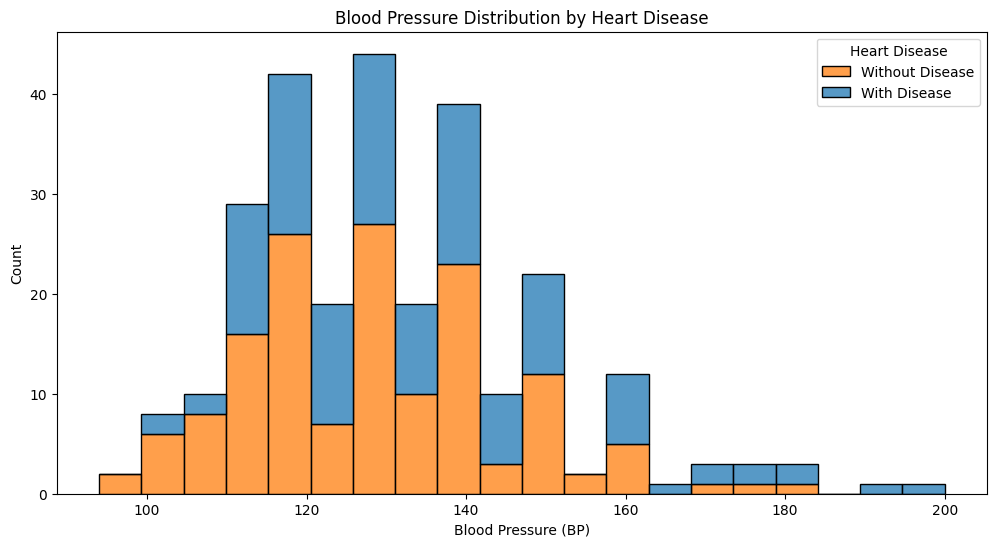

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="BP", hue="Heart Disease", multiple="stack", bins=20)
plt.title('Blood Pressure Distribution by Heart Disease')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

In [99]:
X = df.drop("Heart Disease",axis=1)
Y = pd.get_dummies(df['Heart Disease'])

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [101]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (202, 8)
Shape of Y_train is: (202, 2)

Shape of X_test is: (68, 8)
Shape of Y_test is: (68, 2)


In [102]:
input_dim = X.shape[1]

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [104]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
 dense_8 (Dense)             (None, 2)                 12        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
result = model.fit(X_train, Y_train, epochs = 100, batch_size = 10)

Epoch 1/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7574
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4768 - accuracy: 0.7624
Epoch 3/100
21/21 [==============================] - 0s 10ms/step - loss: 0.4576 - accuracy: 0.8168
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4576 - accuracy: 0.7772
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.7723
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.7871
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.7723
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.7772
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4625 - accuracy: 0.7723
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.7822
Epoch 11

In [113]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

3/3 [==============================] - 0s 3ms/step


In [114]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7794117647058824


In [115]:
model.save('./cardiohealth.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [116]:
model = tf.keras.models.load_model('./cardiohealth.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./cardiohealth.tflite", "wb").write(tflite_model)

2612